In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x = pd.read_csv('x.csv', index_col=0)['0']
y = pd.read_csv('y.csv', index_col=0)['0']

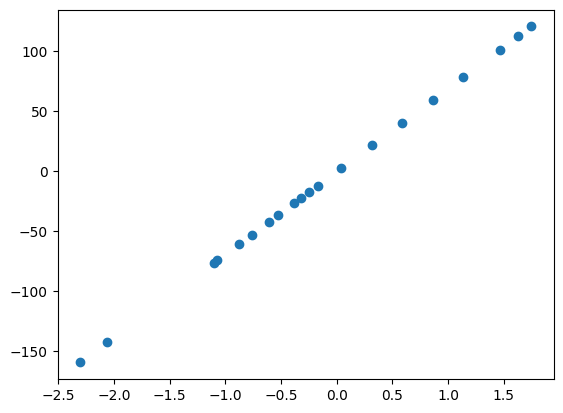

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def fit(self, X, Y):
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [ ]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153406


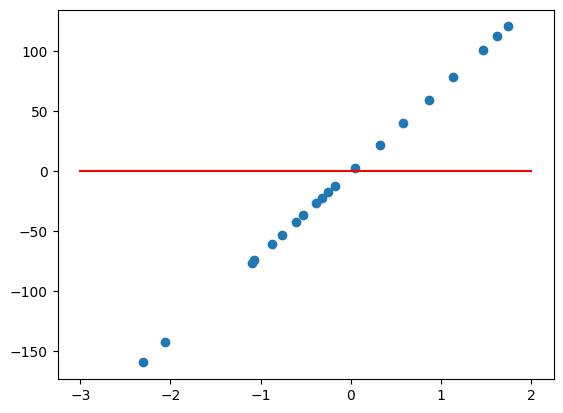

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10_000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.776975306057215e-06


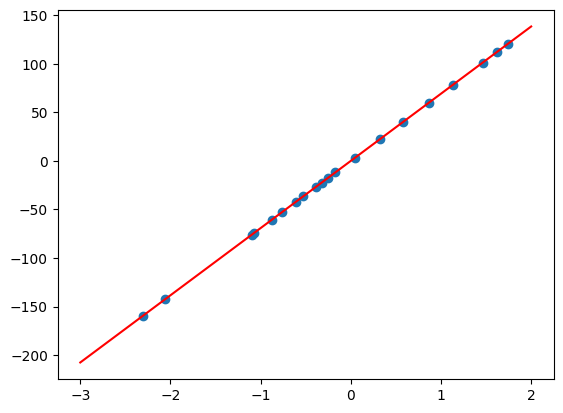

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

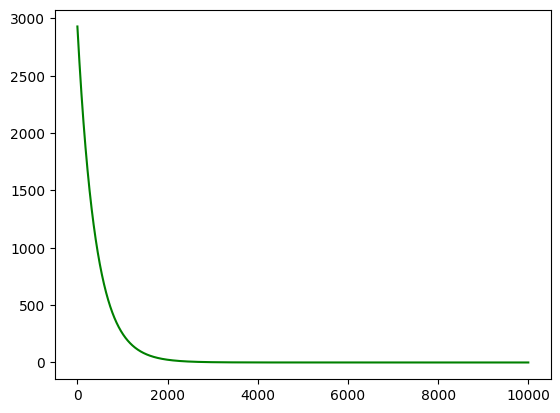

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

error after gradient descent: 2.5413753701886763e-06


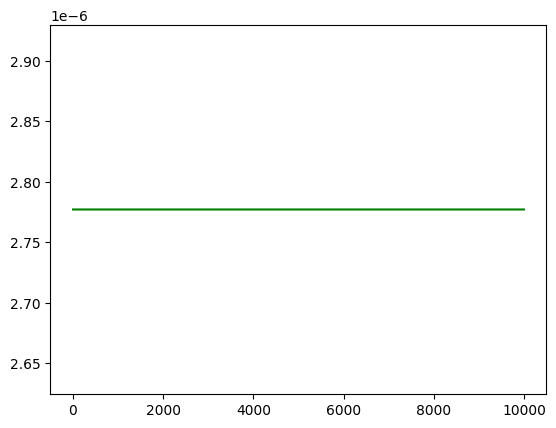

In [ ]:
c = Model()
c.bo = 2
c.b1 = 3
steps, errors = c.fit(x, y)
J = c.error(x, y)
print("error after gradient descent:", J)
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [ ]:
m = Model()
steps, errors = m.fit(x, y, alpha=0.00001)
J = m.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2292.234687418133


Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [ ]:
class Model1(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y, n):
        return np.sum(((self.predict(X) - Y)**2) / (2 * n))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        n=len(X)
        for _ in range(10_000):
            dJ0 = np.sum(self.predict(X) - Y) /n
            dJ1 = np.sum((self.predict(X) - Y) * X)/n
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y, n)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
X = pd.DataFrame(x)
Y = pd.DataFrame(y)
mod = Model1()
steps, errors = mod.fit(X,Y)
J = mod.error(X, Y, len(X))
print("error after gradient descent:", J)

error after gradient descent: 0    0.000003
dtype: float64


Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [ ]:
class Model2(Model1):
      def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000, o=0.000001):
        steps, errors = [], []
        step = 0
        n=len(X)
        for _ in range(10_000):
            dJ0 = np.sum(self.predict(X) - Y) /n
            dJ1 = np.sum((self.predict(X) - Y) * X)/n
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y, n)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if errors[_-1]<new_err:
              break
        return steps, errors

In [ ]:
hyp = Model2()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y, len(x))
print("error after gradient descent:", J)

error after gradient descent: 2.7769753060572152e-06


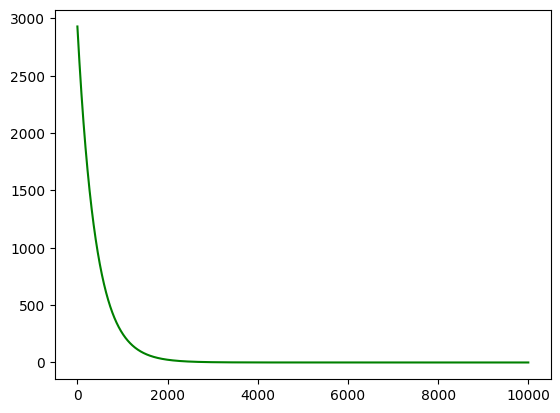

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [ ]:
class Model3(Model1):
      def fit(self, X, Y, accuracy=0.01, max_steps=5000, o=0.000001):
        alpha = 0.9
        steps, errors = [], []
        step = 0
        n=len(X)
        for _ in range(10_000):
            dJ0 = np.sum(self.predict(X) - Y) /n
            dJ1 = np.sum((self.predict(X) - Y) * X)/n
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y, n)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if new_err > errors[_-1]:
               alpha = alpha/2
            continue
        return steps, errors

hyp = Model3()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y, len(x))
print("error after gradient descent:", J)

error after gradient descent: 2.7156536662233335e-29


Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

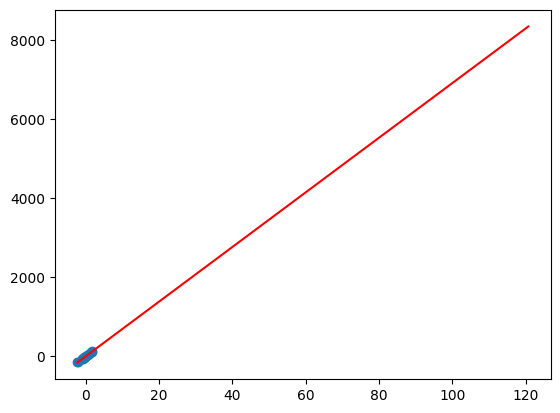

In [ ]:
class Model1(Model1):
  def draw(self,X,Y):
    X0 = np.linspace(min(X), max(Y), 100)
    Y0 = self.predict(X0)
    plt.figure()
    plt.scatter(X, Y)
    plt.plot(X0, Y0, 'r')
    plt.show()

mod = Model1()
steps, errors = mod.fit(x,y)
mod.draw(x,y)